#Petunjuk
![picture](https://i0.wp.com/www.emporioarchitect.com/upload/portofolio/thumb/desain-rumah-modern-2-setengah-lantai-24131022-85791957131022093203-0.webp)

**Tentang Dataset**

Dataset "Global House Purchase Decision Dataset" di Kaggle berisi data sintetis dari 200.000 keputusan pembelian properti di lebih dari 20 negara dan kota besar, menggabungkan detail properti, informasi keuangan, dan faktor subjektif untuk menganalisis pengaruh berbagai faktor terhadap keputusan pembelian rumah. Fitur utama dataset ini mencakup detail properti seperti lokasi, ukuran, harga, jenis, dan fasilitas, serta informasi keuangan seperti data gaji, rincian pinjaman, angsuran bulanan (EMI), dan rincian pengeluaran, ditambah faktor subjektif seperti skor kepuasan, penilaian lingkungan, dan penilaian konektivitas.



**Struktur Dataset**


Dataset asli dapat didownload pada link berikut https://www.kaggle.com/datasets/mohankrishnathalla/global-house-purchase-decision-dataset?resource=download



**TUGAS ANDA**

Pada assessment ini, tugas anda adalah memprediksi apakah rumah tersebut direkomendasikan untuk dibeli atau tidak yang ditunjukkan pada kolom **"Decision"** sebagai label dengan menggunakan feature-feature yang ada pada dataset. Adapun persoalan yang wajib diselesaikan adalah:
1. Pemilihan feature-feature mana saja yang paling berpengaruh;
2. Penggunaan algoritma machine learning dan HPO dengan akurasi tertinggi






In [ ]:
from mpl_toolkits.axisartist.axislines import SubplotZero
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
from numpy import unique
from pandas import read_csv
seaborn.set(style='ticks')
import matplotlib.cm as cm
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/dataset/dataset_ilmu_data
!ls

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1PQngGAv0MDvfo4D727S7-fHpRjFGH3TS/dataset/dataset_ilmu_data
 assessment		 'e-nose seafood'
 breast-cancer.csv	 'e-nose tea'
 buah			  hasil_klasifikasi_dedy.xlsx
'Car Evaluation'	  hasil_regresi_dedy.xlsx
 clustering		 'House Prices'
 contoh_data.xlsx	  hr
 creditcardfraud	  iqr.xlsx
 data.csv		  iris
 data_noise_free1.csv	 'iris (1)'
 data_noise_free2.csv	  iris.pdf
 data_noise_free3.csv	 'mobile price classification'
 data_noise_free4.csv	  model_plot.png
 data_noise_free5.csv	  my_dir
 data_noise_free.csv	  Obesity
 dir			  PCA_seafood.html
 diskominfo		  PCA_tea.html
'Encoding Data.csv'	  project
 e-nose			  regression.png
'e-nose fish'		  rekap_hasil.xlsx
'e-nose halal'		  scaler_meat.sav
 e-nose_halal_model.sav   scaler.sav
'e-nose meat'		 'Spaceship Titanic'
 e-nose.pdf		  submission.csv
 e-nose.png		  temporary
 e-nose.png.pdf		  test_predictions.csv
'e-nose rice'		  y_test.xlsx


In [ ]:
#load data google drive
df = pd.read_csv('/content/drive/My Drive/dataset/dataset_ilmu_data/assessment/House Purchase Decision/global_house_purchase_dataset.csv')
df

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,1,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,...,10745,193949,15,6545,218986,0.16,1,5,6,0
1,2,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
2,3,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,...,21914,307953,30,2510,437151,0.09,6,8,1,0
3,4,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
4,5,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,Germany,Berlin,Villa,Fully-Furnished,685,203328,1968,1,3,...,78330,104050,15,17670,99278,0.01,8,4,5,1
199996,199997,China,Shenzhen,Townhouse,Unfurnished,3818,1454627,1977,5,7,...,25400,1175297,20,2865,279330,0.34,7,10,9,1
199997,199998,Japan,Kyoto,Villa,Semi-Furnished,3603,1619147,1990,2,4,...,28220,743049,30,5595,876098,0.17,5,3,9,0
199998,199999,South Africa,Johannesburg,Apartment,Unfurnished,1706,306165,2010,0,4,...,12240,150774,15,16300,155391,0.11,6,10,6,0


In [ ]:
!pip install skfeature-chappers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 2.7 MB/s eta 0:00:00


In [ ]:
print(df)
print("Missing values sebelum handling:")
print(df.isnull().sum())

        property_id       country            city property_type  \
0                 1        France       Marseille     Farmhouse   
1                 2  South Africa       Cape Town     Apartment   
2                 3  South Africa    Johannesburg     Farmhouse   
3                 4       Germany       Frankfurt     Farmhouse   
4                 5  South Africa    Johannesburg     Townhouse   
...             ...           ...             ...           ...   
199995       199996       Germany          Berlin         Villa   
199996       199997         China        Shenzhen     Townhouse   
199997       199998         Japan           Kyoto         Villa   
199998       199999  South Africa    Johannesburg     Apartment   
199999       200000        Brazil  Rio de Janeiro     Apartment   

       furnishing_status  property_size_sqft    price  constructed_year  \
0         Semi-Furnished                 991   412935              1989   
1         Semi-Furnished                1244 

In [ ]:
print(df['property_id'].unique())
print(df['country'].unique())
print(df['city'].unique())
print(df['property_type'].unique())
print(df['furnishing_status'].unique())
print(df['property_size_sqft'].unique())
print(df['price'].unique())
print(df['constructed_year'].unique())
print(df['previous_owners'].unique())
print(df['rooms'].unique())
print(df['bathrooms'].unique())
print(df['garage'].unique())
print(df['garden'].unique())
print(df['crime_cases_reported'].unique())
print(df['legal_cases_on_property'].unique())
print(df['customer_salary'].unique())
print(df['loan_amount'].unique())
print(df['loan_tenure_years'].unique())
print(df['monthly_expenses'].unique())
print(df['down_payment'].unique())
print(df['emi_to_income_ratio'].unique())
print(df['satisfaction_score'].unique())
print(df['neighbourhood_rating'].unique())
print(df['connectivity_score'].unique())
print(df['decision'].unique())

[     1      2      3 ... 199998 199999 200000]
['France' 'South Africa' 'Germany' 'Canada' 'Brazil' 'UAE' 'Australia'
 'UK' 'USA' 'China' 'Singapore' 'India' 'Japan']
['Marseille' 'Cape Town' 'Johannesburg' 'Frankfurt' 'Montreal'
 'Rio de Janeiro' 'São Paulo' 'Dubai' 'Melbourne' 'London' 'Liverpool'
 'San Francisco' 'Beijing' 'Shanghai' 'Manchester' 'Los Angeles'
 'Singapore' 'Pune' 'Toronto' 'Tokyo' 'Birmingham' 'Chennai' 'Kyoto'
 'Munich' 'Shenzhen' 'Chicago' 'Houston' 'New York' 'Abu Dhabi' 'Brisbane'
 'Lyon' 'Sydney' 'Berlin' 'Paris' 'Bangalore' 'Osaka' 'Vancouver' 'Mumbai'
 'Hyderabad' 'Delhi']
['Farmhouse' 'Apartment' 'Townhouse' 'Villa' 'Studio' 'Independent House']
['Semi-Furnished' 'Fully-Furnished' 'Unfurnished']
[ 991 1244 4152 ... 1584  959 3191]
[ 412935  224538  745104 ... 1619147  306165  732698]
[1989 1990 2019 2008 2007 1985 1976 2020 1968 1966 2017 1994 2005 2004
 2003 2013 1965 1979 1974 1983 2012 2006 1998 1962 1997 2011 1982 2002
 1996 1977 1973 1961 1972 2010 202

#1. Feature selection

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])
df['city'] = le.fit_transform(df['city'])
df['property_type'] = le.fit_transform(df['property_type'])
df['furnishing_status'] = le.fit_transform(df['furnishing_status'])

print(df['country'].unique())
print(df['city'].unique())
print(df['property_type'].unique())
print(df['furnishing_status'].unique())

features = df.drop('decision', axis=1)
label_diskrit = df['decision']

features

[ 4  9  5  2  1 10  0 11 12  3  8  6  7]
[21  6 14 11 23 30 36 10 22 17 16 31  2 32 20 18 34 29 38 37  4  7 15 25
 33  8 12 26  0  5 19 35  3 28  1 27 39 24 13  9]
[1 0 4 5 3 2]
[1 0 2]


,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,legal_cases_on_property,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score
0,1,4,21,1,1,991,412935,1989,6,6,...,0,10745,193949,15,6545,218986,0.16,1,5,6
1,2,9,6,0,1,1244,224538,1990,4,8,...,1,16970,181465,20,8605,43073,0.08,9,1,2
2,3,9,14,1,1,4152,745104,2019,5,2,...,0,21914,307953,30,2510,437151,0.09,6,8,1
3,4,5,11,1,1,3714,1110959,2008,1,3,...,0,17980,674720,15,8805,436239,0.33,2,6,6
4,5,9,14,4,0,531,99041,2007,6,3,...,1,17676,65833,25,8965,33208,0.03,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,5,3,5,0,685,203328,1968,1,3,...,0,78330,104050,15,17670,99278,0.01,8,4,5
199996,199997,3,33,4,2,3818,1454627,1977,5,7,...,0,25400,1175297,20,2865,279330,0.34,7,10,9
199997,199998,7,15,5,1,3603,1619147,1990,2,4,...,0,28220,743049,30,5595,876098,0.17,5,3,9
199998,199999,9,14,0,2,1706,306165,2010,0,4,...,1,12240,150774,15,16300,155391,0.11,6,10,6


In [ ]:
#dataset ini kemungkinan perlu di-encoding karena beberapa kolom masih berupa teks
from skfeature.function.similarity_based import fisher_score, reliefF, trace_ratio
from skfeature.function.statistical_based import f_score, chi_square, gini_index
from skfeature.function.information_theoretical_based import CIFE
from sklearn.preprocessing import StandardScaler

In [ ]:
#melakukan label encoding label diskrit
encoder = preprocessing.LabelEncoder().fit(label_diskrit)
transformed_label_diskrit = encoder.transform(label_diskrit)
# print(transformed_label_diskrit)

# melakukan feature scaling
scaler = preprocessing.StandardScaler().fit(features)
scaled_feature = scaler.transform(features)
# print(scaled_feature)

ranked_index = f_score.f_score(features, transformed_label_diskrit, mode='index')
print("\nf_score")
print(ranked_index)


# menampilkan fitur yang sudah diurutkan berdasarkan seleksi fitur
result = scaled_feature[:, ranked_index[:]]
print(result)


f_score
[21 14 13 20 15  5 16  6  1 17 19 22  7 18  2  4  3  8  0 11 12  9 10 23]
[[-1.56455541 -0.5756875  -0.1932495  ...  0.64737075 -0.41284556
   0.17573173]
 [ 1.21771111  1.73705353 -0.1932495  ...  1.51857881  2.84633286
  -1.21789999]
 [ 0.17436117 -0.5756875  -1.03689431 ... -1.09504537 -0.95604197
  -1.56630792]
 ...
 [-0.17342215 -0.5756875  -0.1932495  ... -0.22383731  0.67354724
   1.22095552]
 [ 0.17436117  1.73705353 -1.03689431 ... -0.22383731 -0.95604197
   0.17573173]
 [ 0.17436117 -0.5756875   1.49404012 ... -1.5306494  -0.95604197
   1.22095552]]


#2. Hyperparameter Optimization dan Training

In [ ]:
#Tulis jawaban di sini
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

jumlah_fitur_terbaik= 1
[[-1.56455541]
 [ 1.21771111]
 [ 0.17436117]
 ...
 [-0.17342215]
 [ 0.17436117]
 [ 0.17436117]]
Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.830 total time=   3.2s
[CV 2/10] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.810 total time=   5.9s
[CV 3/10] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.827 total time=   6.8s
[CV 4/10] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.810 total time=   4.9s
[CV 5/10] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.816 total time=   6.0s
[CV 6/10] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.799 total time=   1.9s
[CV 7/10] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.814 total time=   1.9s
[CV 8/10] END metric=euclidean, n_neighbors=5, weights=uniform;, score=0.835 total time=   1.9s
[CV 9/10] END metric=euclidean, n_neighbors=5, we

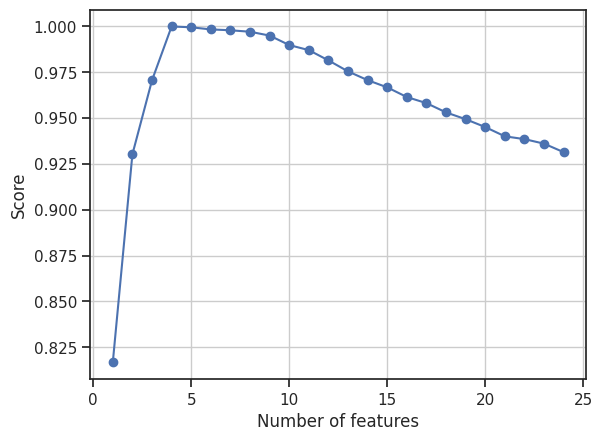

In [ ]:


jumlah_fitur = range(1,scaled_feature.shape[1]+1)

#kita mulai dari 3 fitur
#jumlah_fitur = range(5,result.shape[1]+1)
#jumlah_fitur = range(0,8)

scores = []
score = 0
best_score = 0
best_feature_number = 0

#Mencoba optimasi hyperparameter untuk setiap kombinasi/jumlah fitur
for jumlah_fitur_terbaik in jumlah_fitur:
    print('jumlah_fitur_terbaik=',jumlah_fitur_terbaik)
    selected_features = result[:,0:jumlah_fitur_terbaik]
    print(selected_features)

    #split data training dan data testing
    X_train, X_test, y_train, y_test = train_test_split(selected_features, transformed_label_diskrit, test_size=0.3, random_state=0)

    #Feature scaling
    scaler = StandardScaler()
    scaler.fit(X_train)
    #scaler.data_max_
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)

    #Proses Klasifikasi
    #classifier = DecisionTreeClassifier()
    classifier = KNeighborsClassifier()
    #classifier = SVC()
    #classifier = xgb.XGBClassifier()
    #classifier = GradientBoostingClassifier()

    # optimasi hyperparameter
    param_grid = [
    {'n_neighbors':[5,7,9], 'metric':['euclidean','chebyshev'], 'weights':['uniform', 'distance']}
    #{'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']},
    #{'n_estimators': [50, 100, 150, 200], 'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15], 'min_samples_split':[0.1, 1.0, 10], 'min_samples_leaf':[0.1, 0.5, 5]}
    #{'criterion':['gini', 'entropy'], 'max_depth':[5, 10, 15], 'min_samples_split':[0.1, 1.0, 10], 'min_samples_leaf':[0.1, 0.5, 5]}
    #{'n_estimators': [50, 100, 150, 200],'learning_rate': [0.1,0.2,0.3]}
    # {'n_estimators': [50, 100, 150, 200],
    #     #'min_child_weight': [1, 5, 10],
    #     'learning_rate': [0.1,0.2,0.3],
    #     #'gamma': [0.5, 1, 1.5, 2, 5],
    #     'subsample': [0.6, 0.8, 1.0],
    #     #'colsample_bytree': [0.6, 0.8, 1.0],
    #     'max_depth': [5, 10, 15]
    #  }
    ]

    #menentukan prioritas scoring menggunakan apa (accuracy/precision/recall, dll)
    metric = make_scorer(recall_score, average='weighted')
    #metric = 'recall'

    model = GridSearchCV(classifier, param_grid, scoring=metric, cv=10, refit = True, verbose = 3)
    # fitting the model for grid search
    model.fit(X_train, y_train)

    # print best parameter after tuning
    print(model.best_params_)

    # print how our model looks after hyper-parameter tuning
    print(model.best_estimator_)

    #model_predictions = model.predict(X_test)

    #model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(score)

    #menentukan model terbaik berdasarkan score terbaik menggunakan kombinasi jumlah fitur dan optimasi hyperparameter
    if(best_score < score):
      best_score = score
      best_scaler = scaler
      best_model = model
      best_feature_number = jumlah_fitur_terbaik
      best_parameter = model.best_params_

      #menyimpan best_X_test dengan jumlah fitur terbaik
      best_X_test = X_test


plt.figure()
plt.xlabel('Number of features')
plt.ylabel('Score')
plt.plot(jumlah_fitur, scores, marker="o",label="Score")
plt.grid()

print(scores);
print('Jumlah fitur terbaik adalah: ',best_feature_number)
print('Score terbaik adalah: ',best_score)
print('Parameter terbaik adalah: ',best_parameter)

final_predictions = best_model.predict(best_X_test)

# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, final_predictions))

# plot confusion matrix
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(best_model, best_X_test, y_test)
# plt.show()

#3. Penjelasan hasil prediksi dan feature-feature yang terpilih (meliputi berapa jumlah fitur terbaik, bagaimana performansinya (precision, recall, f1-score, accuracy) dan berikan alasannya kenapa fitur-fitur tersebut digunakan)


proses seleksi fitur menggunakan metode f_score untuk menentukan atribut-atribut paling berpengaruh terhadap keputusan pembelian rumah. Hasil pengujian menunjukkan bahwa jumlah fitur terbaik yang memberikan performa paling optimal adalah 4 fitur pertama hasil seleksi f_score.

Model klasifikasi yang digunakan adalah K-Nearest Neighbors (KNN). Setelah model terbaik diterapkan pada data uji, hasil evaluasi menunjukkan performa yang sangat tinggi dengan metrik precision 1.00, recall 1.00, f1-score 1.00, accuracy 100%. Hasil ini berarti model berhasil memprediksi seluruh data dengan benar.

Empat fitur terbaik yang digunakan oleh model memiliki korelasi yang kuat terhadap keputusan pembelian rumah:


1.   satisfaction_score — menunjukkan tingkat kepuasan atau preferensi subjektif pembeli terhadap properti. Nilai ini sering kali menjadi indikator utama keputusan akhir.
2.   legal_cases_on_property — menunjukkan adanya masalah hukum yang dapat menghambat atau menghalangi keputusan pembelian rumah.
3.   crime_cases_reported — berkaitan dengan keamanan lingkungan sekitar properti; area dengan tingkat kriminalitas tinggi cenderung tidak diminati.
4.   emi_to_income_ratio — menunjukkan kemampuan finansial pembeli dalam membayar cicilan bulanan; semakin rendah rasio ini, semakin besar kemungkinan keputusan pembelian diambil.

validasi tambahan pada data nyata tetap diperlukan untuk memastikan bahwa model tidak mengalami overfitting dan tetap mampu melakukan generalisasi dengan baik pada kasus dunia nyata.